In [1]:
import numpy
import math
import random
import time
import matplotlib.pyplot as plt

In [2]:
environment = numpy.zeros((5, 5))
trans_prob = 1
environment[4, 4] = 10
#environment[2, 3] = -5

In [3]:
alpha = 0.5
gamma = 0.9

In [4]:
def get_legal_actions(pos):
    legal_actions = list()
    new_pos = list()
    all_actions = [[1, 0], [0, 1], [-1, 0], [0, -1]]
    for i in all_actions:
        try:
            new_pos = numpy.add(pos, numpy.array(i))
            legal_actions.append(i)
            env = environment[new_pos[0]][new_pos[1]]
            if any(j < 0 for j in new_pos):
                legal_actions.pop()
        except IndexError:
            legal_actions.pop()
            
        
    return legal_actions

In [40]:
def take_action(pos, action):
    # Take action in the actual environment and return a reward and new position based on environment dynamics
    if numpy.random.rand(1) < 0:
        new_pos = numpy.add(pos, action)
    else:
        new_pos = numpy.add(pos, random.choice(get_legal_actions(pos)))
    reward = environment[new_pos[0]][new_pos[1]]
    return new_pos, reward

In [6]:
mb_internal_environment = numpy.zeros((5, 5))


In [7]:
def mb_internal_environment_value(pos):
    value = mb_internal_environment[pos[0], pos[1]]
    return value

In [17]:
def update_mb_internal_environment(pos, next_pos, reward):
    next_value_list = list()
    for i in get_legal_actions(next_pos):
        next_value_list.append(mb_internal_environment[next_pos[0]][next_pos[1]])
    next_value = max(next_value_list)
    mb_internal_environment[pos[0], pos[1]] = (1-alpha) * mb_internal_environment_value(pos) + (alpha) * (reward + gamma*next_value)
    


In [9]:
def dls(pos, curr_depth, max_depth):
    value_list = list()
    if curr_depth == max_depth:
        return mb_internal_environment_value(pos)
    else:
        actions = get_legal_actions(pos)
        for i in actions:
            next_pos = numpy.add(numpy.array(pos), numpy.array(i))
            value = mb_internal_environment_value(pos) + gamma * dls(next_pos, curr_depth+1, max_depth)
            value_list.append(value)
        if value_list:
            average_value = numpy.mean(numpy.array(value_list))
    return average_value

In [10]:
def dls_action(pos, max_depth):
    # Do depth Limited Search till max_depth on the mb_internal_environment
    actions = get_legal_actions(pos)
    next_value_list = list()
    next_pos_list = list()
    for i in actions:
        next_pos = numpy.add(numpy.array(pos), numpy.array(i))
        next_value_list.append(dls(next_pos, 0, max_depth))
        next_pos_list.append(next_pos)
    action = actions[numpy.argmax(next_value_list)]
    return action

In [11]:
def q_action(pos):
    # Look for q values in mf_internal_environment for given position
    actions = get_legal_actions(pos)
    next_value_list = list()
    next_pos_list = list()
    for i in actions:
        next_pos = numpy.add(numpy.array(pos), numpy.array(i))
        next_value_list.append(mb_internal_environment[next_pos[0], next_pos[1]])
        next_pos_list.append(next_pos)
    action = actions[numpy.argmax(next_value_list)]
    return action

In [12]:
def dual(num_iters):
    sum_reward = 0
    max_depth = 4
    steps_per_reward = 0
    steps = list()
    for i in range(num_iters):
        pos = [0, 0]
        while True:
            if j%(i+1) == 0:
                action = dls_action(pos, max_depth)
                next_pos, reward = take_action(pos, action)
                update_mb_internal_environment(pos, next_pos, reward)
                pos = next_pos
            else:
                action = q_action(pos)
                next_pos, reward = take_action(pos, action)
                update_mb_internal_environment(pos, next_pos, reward)
                pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
            steps_per_reward += 1
            if reward != 0:
                steps.append(steps_per_reward)
                steps_per_reward = 0
                break
    return sum_reward, steps

In [25]:
def mb(num_iters):
    sum_reward = 0
    max_depth = 4
    steps = list()
    for i in range(num_iters):
        pos = [0, 0]
        steps_per_reward = 0
        while True:
            action = dls_action(pos, max_depth)
            next_pos, reward = take_action(pos, action)
            update_mb_internal_environment(pos, next_pos, reward)
            pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
            steps_per_reward += 1
            if reward != 0:
                
                steps.append(steps_per_reward)
                steps_per_reward = 0
                break

    return sum_reward, steps

In [32]:
def mf(num_iters):
    sum_reward = 0
    max_depth = 4
    steps = list()
    for i in range(num_iters):
        pos = [0, 0]
        steps_per_reward = 0        
        print (mb_internal_environment)
        
        while True:
            action = q_action(pos)
            next_pos, reward = take_action(pos, action)
            update_mb_internal_environment(pos, next_pos, reward)
            pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
            steps_per_reward += 1
            if reward != 0:
                mb_internal_environment[pos[0], pos[1]] = (1-alpha) * mb_internal_environment_value(pos) + (alpha) * (reward)
                steps.append(steps_per_reward)
                steps_per_reward = 0
                break
            
    return sum_reward, steps

In [33]:
mb_internal_environment = numpy.zeros((5, 5))


Run the Dual Process on grid world. Get a list of individual time taken for each and rewards obtained.

In [29]:
times_dual = list()
reward_dual = list()
steps_dual = list()
for i in range(10):
    mb_internal_environment = numpy.zeros((5, 5))
    start_time = time.time()
    dual_result = mb(15)
    reward_dual.append(dual_result[0])
    steps_dual.append(dual_result[1])
    times_dual.append(time.time() - start_time)


In [30]:
times_mb = list()
reward_mb = list()
steps_mb = list()
for i in range(10):
    mb_internal_environment = numpy.zeros((5, 5))
    start_time = time.time()
    mb_result = mb(15)
    reward_mb.append(mb_result[0])
    steps_mb.append(mb_result[1])
    times_mb.append(time.time() - start_time)


In [41]:
times_mf = list()
reward_mf = list()
steps_mf = list()
for i in range(10):
    mb_internal_environment = numpy.zeros((5, 5))
    start_time = time.time()
    mf_result = mf(15)
    reward_mf.append(mf_result[0])
    steps_mf.append(mf_result[1])
    times_mf.append(time.time() - start_time)


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  5.]]
[[  0.00000000e+00   0.00000000e+00   8.20769778e-03   2.19820405e-02
    1.36510566e-02]
 [  0.00000000e+00   4.59627884e-03   5.75394259e-02   7.04828215e-03
    7.55417946e-02]
 [  8.99360856e-03   3.38105034e-02   7.52599306e-02   8.36770438e-02
    9.28575866e-02]
 [  8.13234118e-02   1.39451863e-01   2.01495882e-01   2.09957047e-01
    7.25991362e+00]
 [  2.26039182e-01   2.72897771e-01   4.46011304e-01   1.19661734e+00
    7.50000000e+00]]
[[  0.00000000e+00   3.91505748e-03   1.83053135e-02   1.93582349e-02
    1.43749116e-02]
 [  1.10771000e-02   2.29813942e-03   3.37516274e-02   4.31772992e-02
    4.43120192e-02]
 [  5.26644386e-02   7.96585899e-02   4.89689949e-02   1.32013549e-01
    9.28575866e-02]
 [  1.47384039e-01   2.07457472e-01   1.5120448

[[  0.117822     0.13433296   0.18358375   0.24229857   0.28674912]
 [  0.12884139   0.16273898   0.18708381   0.39865397   0.38202208]
 [  0.22206366   0.17359196   0.31572863   2.09061122   2.86638934]
 [  0.31723285   0.45428574   0.64548056   3.09578588  10.78235401]
 [  0.30233086   1.44089863   4.14441726  12.59259683   9.9609375 ]]
[[  0.11400308   0.11465023   0.12177497   0.24229857   0.28674912]
 [  0.11489783   0.13692475   0.16677444   0.39865397   0.38202208]
 [  0.22206366   0.40797775   0.61662271   1.53969332   2.86638934]
 [  0.31723285   0.45428574   1.71584393   8.15534233  13.61799963]
 [  0.30233086   1.44089863   4.14441726  10.28628853   9.98046875]]
[[  0.10221767   0.11894125   0.11312819   0.24229857   0.28674912]
 [  0.19208702   0.13229989   0.22259404   0.39865397   0.38202208]
 [  0.26668321   0.86759714   1.17294539   2.77604739   2.86638934]
 [  0.48601861   0.62470135   2.98325556   6.83665725   8.85754624]
 [  0.30233086   2.1880516    4.26573719  12.9

[[  0.06509946   0.07650546   0.22108901   0.46523886   0.12749194]
 [  0.11450592   0.12897411   0.46296505   1.03218229   1.53771481]
 [  0.16840083   0.15265566   0.8184875    1.23522144   1.32944707]
 [  0.11992388   0.23034561   1.31140256   1.56781863   4.00649436]
 [  0.24356958   0.59386119   2.13636152  11.25928721   9.84375   ]]
[[  0.06697719   0.13774279   0.31990199   0.69710146   0.12749194]
 [  0.11450592   0.12897411   0.5998019    0.72442542   1.53771481]
 [  0.16840083   0.15265566   0.99220995   1.39041855   1.60473102]
 [  0.11992388   0.23034561   1.36121966   1.88975555  10.48846363]
 [  0.24356958   0.59386119   2.13636152  11.25928721   9.921875  ]]
[[  0.1074727    0.15493845   0.24195578   0.29317227   0.66801221]
 [  0.23624541   0.287602     0.4443357    0.40291654   0.93212703]
 [  0.1230775    0.25942372   0.76161312   2.77012509   1.80668327]
 [  0.56639695   0.88484534   2.25410455   4.23544872  11.26011227]
 [  0.73114319   0.69300629   1.77382741   6.3

    9.92187500e+00]]
[[  8.20426644e-03   9.12570297e-03   4.42912318e-02   1.80495823e-02
    1.17452371e+00]
 [  7.28656572e-02   1.01639578e-01   5.98203727e-01   2.18341745e-01
    3.36751562e+00]
 [  2.05519817e-02   1.38453850e-01   7.75264304e-01   1.55439940e+00
    7.34398909e+00]
 [  2.21061771e-02   7.99760839e-01   2.61902704e+00   2.55709679e+00
    1.54950565e+01]
 [  1.02911122e-01   1.19067505e+00   4.74164129e+00   1.24311647e+01
    9.96093750e+00]]
[[  0.07488804   0.08719521   0.79110068   1.14145512   1.25822206]
 [  0.08307271   0.16927492   0.28414326   1.05494647   4.85312125]
 [  0.12863462   0.66005634   1.434027     0.53681507   8.19709834]
 [  0.02210618   0.79976084   2.47341898   4.01563794  13.84943999]
 [  0.10291112   1.19067505   3.5287313    7.83275128   9.98046875]]
[[  0.16305818   0.21474843   0.53558802   1.05613486   2.46176931]
 [  0.09038479   0.38166281   0.28414326   1.35732027   4.16668003]
 [  0.14158173   0.3014522    1.434027     5.377225

In [42]:
print (steps_mf[2])


[82, 16, 158, 40, 40, 126, 48, 72, 10, 18, 112, 24, 98, 22, 34]


[ 29.2  52.4  38.6  55.6  37.   67.   33.4  40.   47.8  37.8  59.2  32.8
  38.2  53.4  75.4]
[ 38.2  44.   26.2  30.4  32.4  45.2  31.6  46.   33.   38.2  31.4  53.4
  35.4  35.2  29.6]
[ 31.   47.6  55.6  33.6  42.   54.   40.6  38.4  35.4  35.6  47.   45.
  43.8  34.2  45.8]


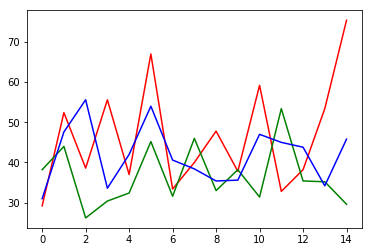

In [20]:
#print (sum(steps_mf)/300)
#print (sum(steps_mb)/300)
#print (sum(steps_dual)/300)
print (numpy.mean(numpy.array(steps_mf), axis=0))
print (numpy.mean(numpy.array(steps_dual), axis=0))
print (numpy.mean(numpy.array(steps_mb), axis=0))

stepsmf_plot, = plt.plot(numpy.arange(0, 15), numpy.mean(numpy.array(steps_mf), axis=0), color = 'r')
stepsdual_plot, = plt.plot(numpy.arange(0, 15), numpy.mean(numpy.array(steps_dual), axis=0), color = 'g')
stepsmb_plot, = plt.plot(numpy.arange(0, 15), numpy.mean(numpy.array(steps_mb), axis=0), color = 'b')

#plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.show()

In [44]:
reward_mean_dual = numpy.mean(numpy.array(reward_dual))
reward_mean_mb = numpy.mean(numpy.array(reward_mb))
reward_mean_mf = numpy.mean(numpy.array(reward_mf))
times_mean_dual = numpy.mean(numpy.array(times_dual))
times_mean_mb = numpy.mean(numpy.array(times_mb))
times_mean_mf = numpy.mean(numpy.array(times_mf))
steps_mean_dual = sum(steps_dual)/400
steps_mean_mb = sum(steps_mb)/400
steps_mean_mf = sum(steps_mf)/400


In [45]:
reward_errors = ([max(reward_dual) - numpy.mean(numpy.array(reward_dual)), max(reward_mb) - numpy.mean(numpy.array(reward_mb)), max(reward_mf) - numpy.mean(numpy.array(reward_mf))]), 

In [46]:
times_errors = ([max(times_dual) - numpy.mean(numpy.array(times_dual)), max(times_mb) - numpy.mean(numpy.array(times_mb)), max(times_mf) - numpy.mean(numpy.array(times_mf))]), 

In [47]:
times_errors = ([max(times_dual) - numpy.mean(numpy.array(times_dual)), max(times_mb) - numpy.mean(numpy.array(times_mb)), max(times_mf) - numpy.mean(numpy.array(steps_mf))]), 

In [48]:
rewards = numpy.array([reward_mean_mb, reward_mean_dual, reward_mean_mf])
#yerror = numpy.array(reward_errors)
print (rewards)

[ 5.00593811  5.0029708   5.00012459]


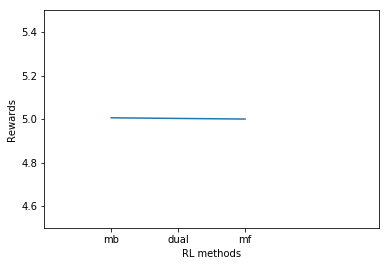

In [49]:
reward_plot, = plt.plot(numpy.arange(0, 3), rewards)
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 4)
plt.ylim(ymin = 4.5, ymax = 5.5)
plt.xlabel('RL methods')
plt.ylabel("Rewards")

plt.show()

[ 7.38872306  7.37350442  0.07987127]


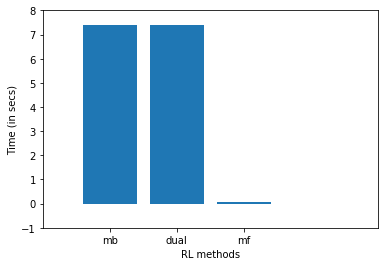

In [51]:
times = numpy.array([times_mean_mb, times_mean_dual, times_mean_mf])
print (times)
plt.bar(numpy.arange(3), times, align='center')
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 4)
plt.ylim(ymin = -1, ymax = 8)
plt.xlabel('RL methods')
plt.ylabel("Time (in secs)")

plt.show()

[ 48.325  45.015  55.955]


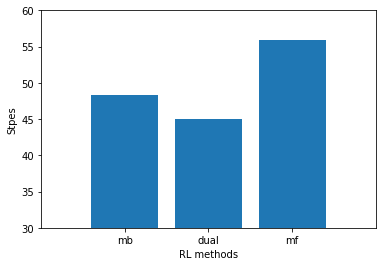

In [52]:
steps = numpy.array([steps_mean_mb, steps_mean_dual, steps_mean_mf])
print (steps)
plt.bar(numpy.arange(3), steps, align='center')
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 3)
plt.ylim(ymin = 30, ymax = 60)
plt.xlabel('RL methods')
plt.ylabel("Stpes")

plt.show()